In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from datetime import datetime
import matplotlib

#### Load in dataset

In [3]:
df_tr = pd.read_csv("data/train.csv")

In [96]:
df_tst = pd.read_csv("data/test.csv")

# Location location ;)

In [3]:
loc = df_tr["prop_location_score2"]
clicked = df_tr["click_bool"]
booked = df_tr["booking_bool"]

In [22]:
print("NaNs:")
print("Number: ",loc.isnull().sum())
print("Percentage:, ", loc.isnull().sum()/len(loc) * 100, "\n")

print("Unique values:")
print("Number: ", len(loc.unique()))
print("Percentage: ", len(loc.unique())/len(loc) * 100, "\n")

print("Max: ", max(loc))
print("Min: ", min(loc))
print("Mean: ", np.mean(loc))

loc_no_nan = loc.fillna(np.mean(loc))

NaNs:
Number:  1090348
Percentage:,  21.9901511532 

Unique values:
Number:  9343
Percentage:  0.18842973273149297 

Max:  1.0
Min:  0.0
Mean:  0.13038516788660134


#### Histogram

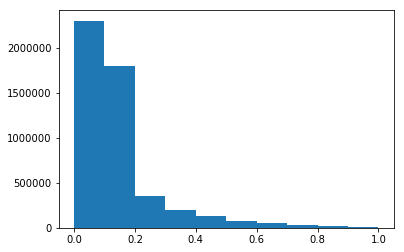

In [5]:
plt.hist(loc_no_nan)
plt.show()

#### booked and clicked

In [6]:
booked_loc = []
for i in range(len(loc)):
    if booked[i] == 1: 
        booked_loc.append(loc[i])

In [7]:
clicked_loc = []
for i in range(len(loc)):
    if clicked[i] == 1: 
        clicked_loc.append(loc[i])

In [17]:
booked_loc = pd.Series(booked_loc)
clicked_loc = pd.Series(clicked_loc)

In [20]:
print("Mean clicked: ", np.mean(clicked_loc))
print("Mean booked: ", np.mean(booked_loc))
        
print("Percentage nan clicked: ", clicked_loc.isnull().sum()/len(clicked_loc)*100)
print("Percentage nan booked: ", booked_loc.isnull().sum()/len(booked_loc)*100)

Mean clicked:  0.1814377599270505
Mean booked:  0.18859192194712773
Percentage nan clicked:  12.0245719514
Percentage nan booked:  10.4588481827


In [23]:
booked_no_nan = booked_loc.fillna(np.mean(booked_loc))
clicked_no_nan = clicked_loc.fillna(np.mean(clicked_loc))

In [55]:
booked_all = np.histogram(booked_no_nan, 50)[0] / np.histogram(loc_no_nan, 50)[0]
clicked_all = np.histogram(clicked_no_nan, 50)[0] / np.histogram(loc_no_nan, 50)[0]

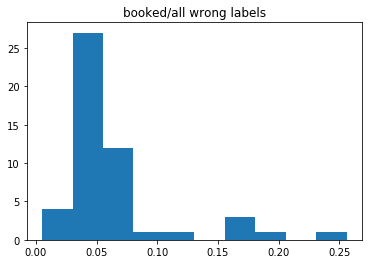

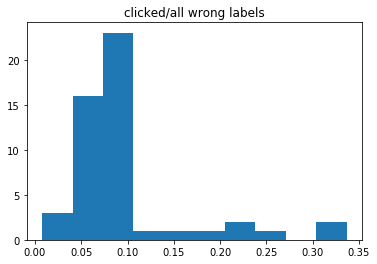

In [56]:
plt.hist(booked_all)
plt.title("booked/all wrong labels")
plt.show()
plt.hist(clicked_all)
plt.title("clicked/all wrong labels")
plt.show()

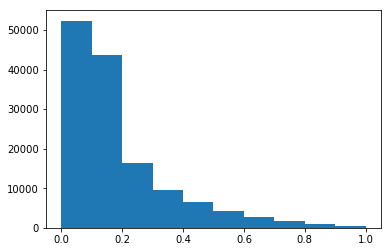

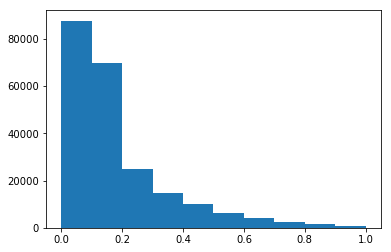

In [59]:
plt.hist(booked_no_nan)
plt.show()
plt.hist(clicked_no_nan)
plt.show()

# Date Time :>

In [4]:
dates = df_tr["date_time"]
clicked = df_tr["click_bool"]
booked = df_tr["booking_bool"]

dates = pd.to_datetime(dates)

In [5]:
print("Number of NaNs: ", dates.isnull().sum(), "\n")

print("Unique values:")
print("Number: ", len(dates.unique()))
print("Percentage: ", len(dates.unique())/len(dates) * 100, "\n")

print("Max: ", max(dates))
print("Min: ", min(dates))

Number of NaNs:  0 

Unique values:
Number:  198615
Percentage:  4.005669631431604 

Max:  2013-06-30 23:58:24
Min:  2012-11-01 00:08:29


In [101]:
days = []
months = []
times = []
for date in dates:
    days.append(date.isoweekday())
    months.append(date.month)
    times.append(date.hour)
    
days = pd.Series(days)
months = pd.Series(months)
times = pd.Series(times)

Unique months:  8
Unique days:  7
Unique hours:  24


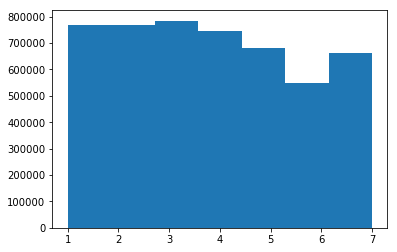

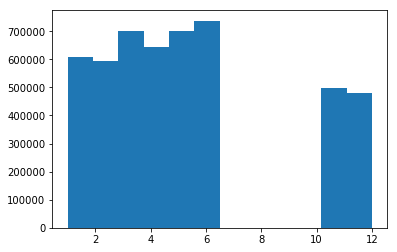

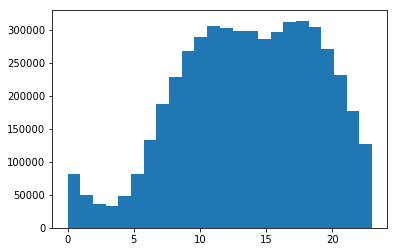

In [102]:
print("Unique months: ",len(months.unique()))
print("Unique days: ",len(days.unique()))
print("Unique hours: ", len(times.unique()))

plt.hist(days, 7)
plt.show()
plt.hist(months, 12)
plt.show()
plt.hist(times, 24)
plt.show()

In [103]:
booked_dates = []
for i in range(len(dates)):
    if booked[i] == 1: 
        booked_dates.append(dates[i])

clicked_dates = []
for i in range(len(dates)):
    if clicked[i] == 1: 
        clicked_dates.append(dates[i])
        
booked_dates = pd.Series(booked_dates)
clicked_dates = pd.Series(clicked_dates)

In [104]:
print("Unique values:")
print("Number clicked: ", len(clicked_dates.unique()))
print("Percentage: ", len(clicked_dates.unique())/len(clicked_dates) * 100, "\n")

print("Number booked: ", len(booked_dates.unique()))
print("Percentage: ", len(booked_dates.unique())/len(booked_dates) * 100, "\n")

print("Max clicked & booked: ", max(clicked_dates),"&", max(booked_dates))
print("Minclicked & booked: ", min(clicked_dates),"&", min(booked_dates))

Unique values:
Number clicked:  198615
Percentage:  89.51500592665371 

Number booked:  137786
Percentage:  99.56355227978901 

Max clicked & booked:  2013-06-30 23:58:24 & 2013-06-30 23:46:18
Minclicked & booked:  2012-11-01 00:08:29 & 2012-11-01 00:09:21


In [106]:
days_click = []
months_click = []
times_click = []

for date in clicked_dates:
    days_click.append(date.isoweekday())
    months_click.append(date.month)
    times_click.append(date.hour)
    
days_click = pd.Series(days_click)
months_click = pd.Series(months_click)
times_click = pd.Series(times_click)

In [107]:
days_book = []
months_book = []
times_book = []

for date in booked_dates:
    days_book.append(date.isoweekday())
    months_book.append(date.month)
    times_book.append(date.hour)
    
days_book = pd.Series(days_book)
months_book = pd.Series(months_book)
times_book = pd.Series(times_book)

Unique months:  8


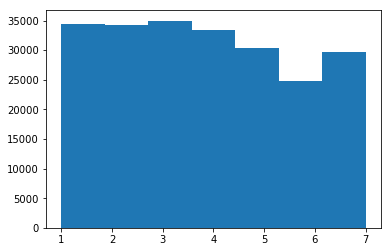

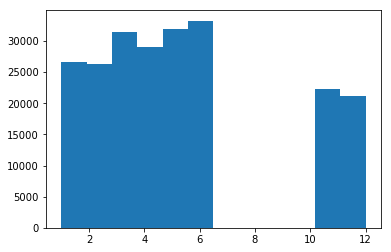

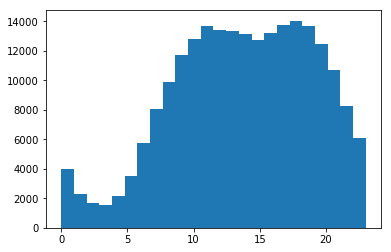

In [108]:
print("Unique months: ",len(months_click.unique()))

plt.hist(days_click, 7)
plt.show()
plt.hist(months_click, 12)
plt.show()
plt.hist(times_click,24)
plt.show()

Unique months:  8


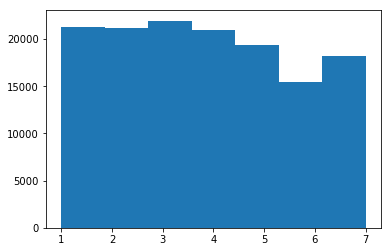

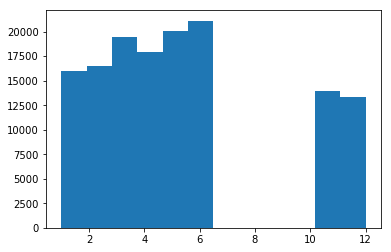

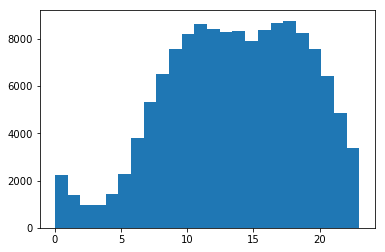

In [109]:
print("Unique months: ",len(months_book.unique()))

plt.hist(days_book, 7)
plt.show()
plt.hist(months_book, 12)
plt.show()
plt.hist(times_book,24)
plt.show()

In [98]:
min(df_tst["date_time"])

'2012-11-01 00:01:37'

In [99]:
max(df_tst["date_time"])

'2013-06-30 23:55:44'

# Length of stay \*.\*

In [122]:
stay = df_tr["srch_length_of_stay"]
clicked = df_tr["click_bool"]
booked = df_tr["booking_bool"]

In [123]:
print("Number of NaNs: ", stay.isnull().sum(), "\n")

print("Unique values:")
print("Number: ", len(stay.unique()))
print("Percentage: ", len(stay.unique())/len(stay) * 100, "\n")

print("Max: ", max(stay))
print("Min: ", min(stay))

Number of NaNs:  0 

Unique values:
Number:  36
Percentage:  0.0007260484189589797 

Max:  57
Min:  1


In [ ]:
plt.hist()